# **Web Ad Optimization using UBC**

## **Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## **Load Dataset into Notebook**

In [2]:
from google.colab import files
uploaded = files.upload()

Saving webAdOptimizationDataset.csv to webAdOptimizationDataset.csv


## **Load Dataset**

In [4]:
dataset = pd.read_csv('webAdOptimizationDataset.csv')
dataset

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,0,0,0,0,1,0,0
9996,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0
9998,1,0,0,0,0,0,0,1,0,0


## **Dataset Summarization**

In [5]:
print(dataset.shape)
print(dataset.head(5))

(10000, 10)
   Ad 1  Ad 2  Ad 3  Ad 4  Ad 5  Ad 6  Ad 7  Ad 8  Ad 9  Ad 10
0     1     0     0     0     1     0     0     0     1      0
1     0     0     0     0     0     0     0     0     1      0
2     0     0     0     0     0     0     0     0     0      0
3     0     1     0     0     0     0     0     1     0      0
4     0     0     0     0     0     0     0     0     0      0


## **Upper Confidence Bound**

In [12]:
import math
observations = 10000
no_of_Ads = 10
ads_selected = []
numbers_of_selections_of_each_ads = [0] * no_of_Ads
sums_of_rewards_of_each_ads = [0] * no_of_Ads
total_reward = 0
for n in range(0,observations):
  ad = 0
  max_upper_bound = 0
  for i in range(0, no_of_Ads):
    if(numbers_of_selections_of_each_ads[i] > 0):
      average_reward = sums_of_rewards_of_each_ads[i] / numbers_of_selections_of_each_ads[i]
      delta_i = math.sqrt(3/2*math.log(n+1) / numbers_of_selections_of_each_ads[i])
      upper_bound = average_reward + delta_i

    else :
      upper_bound = 1e400

    if upper_bound > max_upper_bound:
      max_upper_bound = upper_bound
      ad = i

    ads_selected.append(ad)
    numbers_of_selections_of_each_ads[ad] =  numbers_of_selections_of_each_ads[ad] + 1
    reward = dataset.values[n, ad]
    sums_of_rewards_of_each_ads[ad] = sums_of_rewards_of_each_ads[ad] + reward
    total_reward = total_reward + reward

print("Rewards by Ads = ", sums_of_rewards_of_each_ads)
print("Total Rewards by UCB", total_reward)
print("Ads selected at each round:", ads_selected)


Rewards by Ads =  [5570, 335, 93, 419, 15402, 5, 26, 332, 45, 11]
Total Rewards by UCB 22238
Ads selected at each round: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 6, 6, 6, 6, 0, 0, 0, 0, 0, 0, 6, 7, 7, 7, 0, 0, 0, 0, 0, 0, 0, 7, 8, 8, 0, 0, 0, 0, 4, 5, 5, 7, 8, 9, 0, 0, 0, 3, 3, 3, 6, 6, 8, 9, 0, 0, 2, 2, 4, 4, 4, 7, 8, 9, 0, 0, 0, 0, 0, 5, 5, 7, 8, 9, 0, 1, 1, 1, 1, 1, 6, 6, 8, 9, 0, 0, 2, 2, 2, 5, 5, 7, 8, 8, 0, 0, 0, 3, 3, 3, 6, 7, 7, 9, 0, 0, 0, 0, 4, 4, 4, 7, 7, 7, 0, 0, 2, 2, 2, 5, 6, 7, 7, 9, 0, 1, 1, 3, 3, 5, 6, 7, 8, 8, 0, 0, 0, 0, 4, 4, 6, 7, 7, 9, 0, 1, 1, 3, 3, 5, 5, 7, 8, 9, 0, 1, 1, 1, 1, 1, 1, 7, 7, 7, 0, 1, 2, 2, 4, 4, 6, 7, 8, 9, 0, 1, 1, 3, 3, 5, 6, 7, 8, 9, 0, 0, 2, 2, 4, 5, 6, 7, 8, 8, 0, 0, 0, 3, 4, 4, 6, 7, 7, 7, 0, 1, 1, 1, 4, 4, 6, 7, 8, 8, 0, 1, 1, 1, 4, 4, 4, 7, 7, 7, 0, 1, 1, 1, 1, 1, 1, 7, 7, 9, 0, 1, 1,

## **Visualization Result**

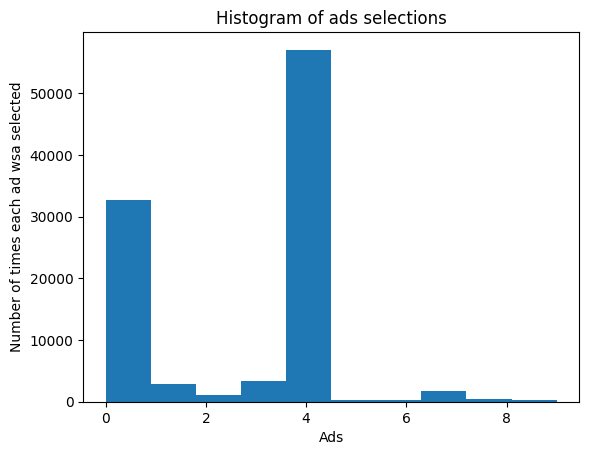

In [13]:
plt.hist(ads_selected)
plt.title("Histogram of ads selections")
plt.xlabel("Ads")
plt.ylabel("Number of times each ad wsa selected")
plt.show()